- Algorithm a_star and hamming heurisic from https://gist.github.com/flatline/838202 customized to our implementation

In [4]:
from puzzle import Puzzle
from heuristic import h_manhattan, h_hamming
from algorithm import a_star, is_solvable

In [5]:
import time, timeit, tracemalloc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Solvability

- The most important aspect about solving the 8 puzzle is the question, can the puzzle be solved at all?
- This can be checked via the number of inversion.
- If the number of inversions is odd in the input state the puzzle is not solvable.
- If the number of inversions is even in the input state the puzzle is solveable.
- Moreover the time how long the puzzle take to finish can be calculated with nlog(n)

## Unsolvable

In [6]:
initial_state = [
    [8, 1, 2],
    [0, 4, 3],
    [7, 6, 5]
]
is_solvable(initial_state)
print("Solveable?", is_solvable(initial_state))


Solveable? False


|   |   |   |
|---|---|---|
| 8 | 1 | 2 |
| 0 | 4 | 3 |
| 7 | 6 | 5 |

In [8]:
initial_state = [
    [8, 1, 6],
    [0, 4, 5],
    [7, 2, 3]
]
is_solvable(initial_state)
print("Solveable?", is_solvable(initial_state))

Solveable? False


|   |   |   |
|---|---|---|
| 8 | 1 | 6 |
| 0 | 4 | 5 |
| 7 | 2 | 3 |

In [9]:
initial_state = [
    [2, 1, 6],
    [0, 4, 5],
    [7, 3, 8]
]
is_solvable(initial_state)
print("Solveable?", is_solvable(initial_state))

Solveable? False


|   |   |   |
|---|---|---|
| 2 | 1 | 6 |
| 0 | 4 | 5 |
| 7 | 3 | 8 |

In [10]:
initial_state = [
    [6, 5, 4],
    [0, 8, 7],
    [1, 2, 3]
]
is_solvable(initial_state)
print("Solveable?", is_solvable(initial_state))

Solveable? False


|   |   |   |
|---|---|---|
| 6 | 5 | 4 |
| 0 | 8 | 7 |
| 1 | 2 | 3 |

## Solvable

In [11]:
initial_state = [
    [1, 8, 2],
    [0, 4, 3],
    [7, 6, 5]
]
is_solvable(initial_state)
print("Solveable?", is_solvable(initial_state))

Solveable? True


|   |   |   |
|---|---|---|
| 1 | 8 | 2 |
| 0 | 4 | 3 |
| 7 | 6 | 5 |

In [12]:
initial_state = [
    [1, 8, 2],
    [0, 6, 3],
    [5, 4, 7]
]
is_solvable(initial_state)
print("Solveable?", is_solvable(initial_state))

Solveable? True


|   |   |   |
|---|---|---|
| 1 | 8 | 2 |
| 0 | 6 | 3 |
| 5 | 4 | 7 |

In [13]:
initial_state = [
    [1, 4, 2],
    [0, 6, 5],
    [3, 8, 7]
]
is_solvable(initial_state)
print("Solveable?", is_solvable(initial_state))

Solveable? True


|   |   |   |
|---|---|---|
| 1 | 4 | 2 |
| 0 | 6 | 5 |
| 3 | 8 | 7 |

In [14]:
initial_state = [
    [1, 6, 8],
    [0, 4, 2],
    [5, 3, 7]
]
is_solvable(initial_state)
print("Solveable?", is_solvable(initial_state))

Solveable? True


|   |   |   |
|---|---|---|
| 1 | 6 | 8 |
| 0 | 4 | 2 |
| 5 | 3 | 7 |

# Heuristics

In [15]:
results_manhattan = []

def results_print_manhattan():
    for result in results_manhattan:
        print("Time in ms", result['time'])
        print("CPU", result["cpu_time"]) 
        print("Memory in kb", result["memory"])
        print("Peak Memory in kb", result["peek_memory"])
        print("Steps to solve the puzzle", result["steps_to_solve"], "\n")
        
def add_to_manhattan_results(initial_s, time, cpu_time, memory, peek_memory, count):
    results_manhattan.append({
        'time': time,
        "cpu_time": cpu_time,
        "memory": memory,
        "peek_memory": peek_memory,
        "steps_to_solve": count
    })

In [20]:
results_hamming = []
def results_print_hamming():
    for result in results_hamming:
        print("Time in ms", result['time'])
        print("CPU", result["cpu_time"]) 
        print("Memory in kb", result["memory"])
        print("Peak Memory in kb", result["peek_memory"])
        print("Steps to solve the puzzle", result["steps_to_solve"], "\n")
        
def add_to_hamming_results(initial_s, time, cpu_time, memory, peek_memory, count):
    results_hamming.append({
        'time': time,
        "cpu_time": cpu_time,
        "memory": memory,
        "peek_memory": peek_memory,
        "steps_to_solve": count
    })

## Manhattan

In [17]:
initial_state = [
    [1, 5, 2],
    [4, 0, 3],
    [7, 8, 6]
]
memory_manhattan = []
time_manhatttan = []
cpu_manhatttan = []
solve_manhatttan = []
solvable = is_solvable(initial_state)
if solvable:
    p = Puzzle(initial_state)
    
    start = time.time()
    clock_start = timeit.default_timer()
    count = a_star(p, h_manhattan)
    elapsed_time = time.time() - start
    elapsed_clock = timeit.default_timer() - clock_start
    
    tracemalloc.start()
    count = a_star(p, h_manhattan)
    current, peak = tracemalloc.get_traced_memory()
    current_calc = current / 10**3
    peak_calc = peak / 10**3
    
    print(f"Current memory usage is {current_calc}KB; Peak was {peak_calc}KB")    
    print("Solved with ", h_manhattan, ': ', count, "states", "time", elapsed_time,"ms")
    
    add_to_manhattan_results(p, elapsed_time, elapsed_clock, current_calc, peak_calc, count)
    memory_manhattan.append(current_calc)
    time_manhatttan.append(elapsed_time)
    cpu_manhatttan.append(elapsed_clock)
    solve_manhatttan.append(count)
    tracemalloc.stop()


Current memory usage is 0.048KB; Peak was 3.056KB
Solved with  <function h_manhattan at 0x0000013D0F08D840> :  5 states time 0.0 ms


In [18]:
results_print_manhattan()

Time in ms 0.0
CPU 0.0003337
Memory in kb 0.048
Peak Memory in kb 3.056
Steps to solve the puzzle 5 



## Hamming

In [21]:
initial_state = [
    [1, 5, 2],
    [4, 0, 3],
    [7, 8, 6]
]
memory_hamming = []
time_hamming = []
cpu_hamming = []
solve_hamming = []
solvable = is_solvable(initial_state)
if solvable:
    p = Puzzle(initial_state)
    start = time.time()
    clock_start = timeit.default_timer()
    count = a_star(p, h_hamming)
    elapsed_time = (time.time() - start)*1000
    elapsed_clock = timeit.default_timer() - clock_start
    
    tracemalloc.start()
    p = Puzzle(initial_state)
    current, peak = tracemalloc.get_traced_memory()
    current_calc = current / 10**3
    peak_calc = peak / 10**3
    
    print(f"Current memory usage is {current_calc}KB; Peak was {peak_calc}KB")  
    print("Solved with ", h_hamming, ': ', count, "states", "time", elapsed_time,"ms")
    
    add_to_hamming_results(p, elapsed_time, elapsed_clock, current_calc, peak_calc, count)
    memory_hamming.append(current_calc)
    time_hamming.append(elapsed_time)
    cpu_hamming.append(elapsed_clock)
    solve_hamming.append(count)
    tracemalloc.stop()

Current memory usage is 0.096KB; Peak was 0.096KB
Solved with  <function h_hamming at 0x0000013D0F08D8C8> :  16 states time 0.99945068359375 ms


In [22]:
results_print_hamming()

Time in ms 0.99945068359375
CPU 0.0016490000000004557
Memory in kb 0.096
Peak Memory in kb 0.096
Steps to solve the puzzle 16 



## Comparsion

In [27]:
df_manhattan = pd.DataFrame(results_manhattan)
df_hamming = pd.DataFrame(results_hamming)
print(df_manhattan, "\n")
print(df_hamming)


   time  cpu_time  memory  peek_memory  steps_to_solve
0   0.0  0.000334   0.048        3.056               5 

       time  cpu_time  memory  peek_memory  steps_to_solve
0  0.999451  0.001649   0.096        0.096              16


|   |   |   |
|---|---|---|
| 1 | 5 | 2 |
| 4 | 0 | 3 |
| 7 | 8 | 6 | 

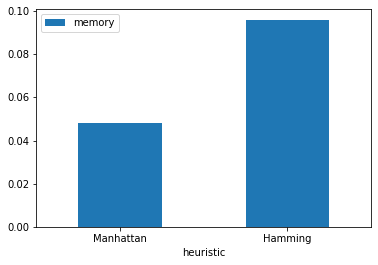

In [28]:
df = pd.DataFrame({'heuristic':['Manhattan', 'Hamming'], 'memory':[memory_manhattan[0], memory_hamming[0]]})
ax = df.plot.bar(x='heuristic', y='memory', rot=0)

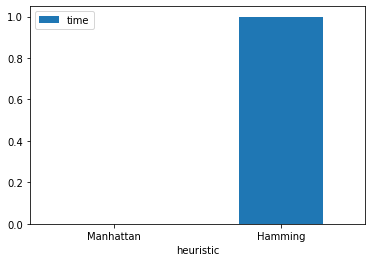

In [29]:
df = pd.DataFrame({'heuristic':['Manhattan', 'Hamming'], 'time':[time_manhatttan[0], time_hamming[0]]})
ax = df.plot.bar(x='heuristic', y='time', rot=0)

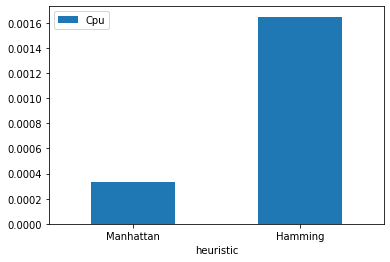

In [30]:
df = pd.DataFrame({'heuristic':['Manhattan', 'Hamming'], 'Cpu':[cpu_manhatttan[0], cpu_hamming[0]]})
ax = df.plot.bar(x='heuristic', y='Cpu', rot=0)

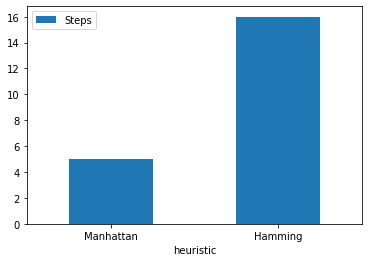

In [31]:
df = pd.DataFrame({'heuristic':['Manhattan', 'Hamming'], 'Steps':[solve_manhatttan[0], solve_hamming[0]]})
ax = df.plot.bar(x='heuristic', y='Steps', rot=0)

## Summary

- As you can see in the plot the manhattan heuristic needs less steps than the hamming heuristic 
- Moreover the memory consumption for manhattan is also less in comparison with the hamming heuistic 
- The Cpu process the manhattan heuristic also much faster
- All in all it can be said that the manhattan heuristic is the prefered way in terms of memory usage, cpu usage, time needed to solve the puzzle and also less steps are needed